## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
The company wants to know:
•	Which variables are significant in predicting the price of a house, and
•	How well those variables describe the price of a house.
 
Also, determine the optimal value of lambda for ridge and lasso regression.
 
### Business Goal 
 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the data
housing = pd.read_csv("train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
#looking at the shape 
print(housing.shape)

(1460, 81)


In [4]:
#looking at the info of the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#looking at the statistical aspects of the data
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [6]:
# MSSubClass is a categorical variable represented by numbers, Hence converting the dtype to object
housing['MSSubClass'] = housing['MSSubClass'].astype('object')

In [7]:
# Separating the Numerical and Categorical features for analysis
numeric = housing.select_dtypes(include=['int64', 'float64'])
categorical = housing.select_dtypes(include=['object'])

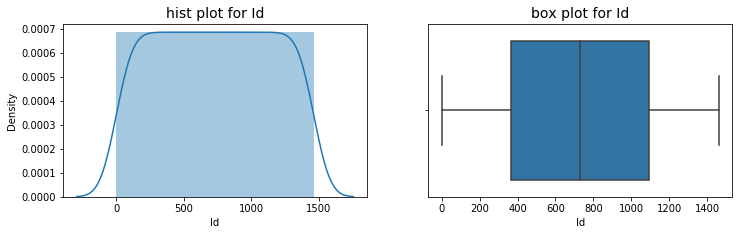

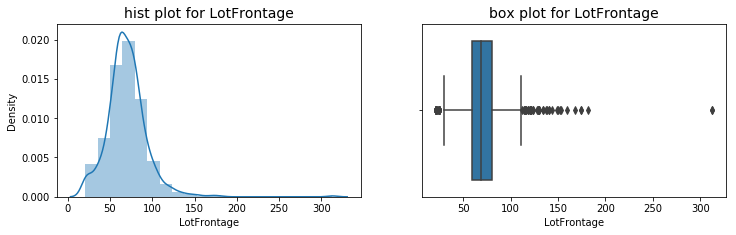

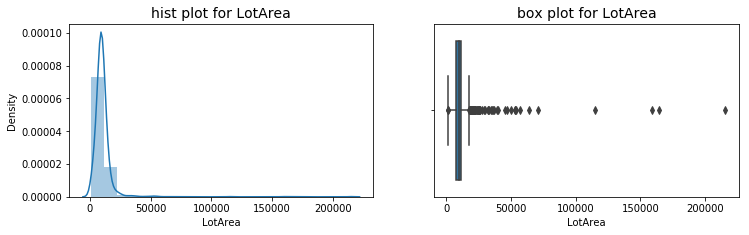

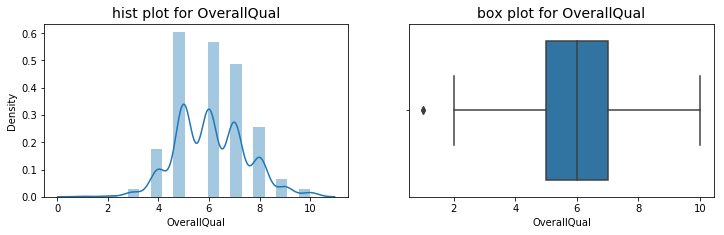

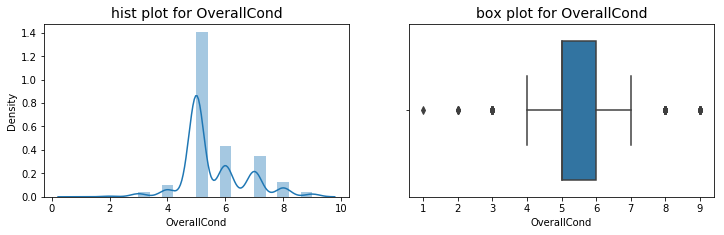

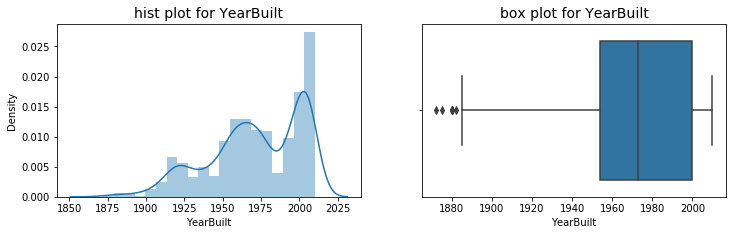

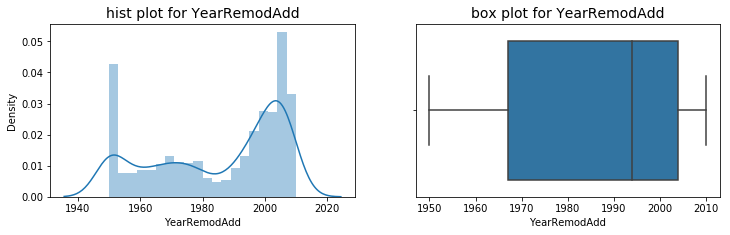

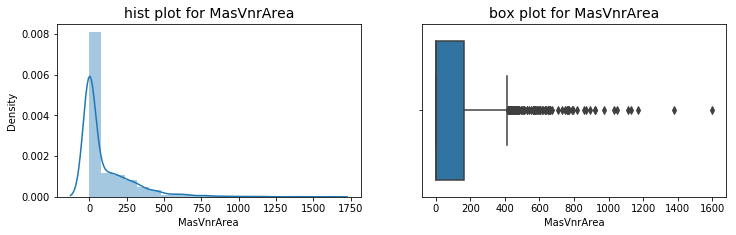

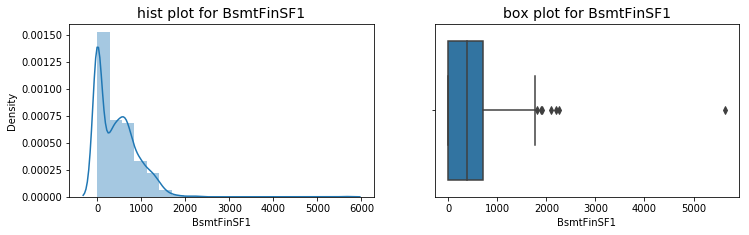

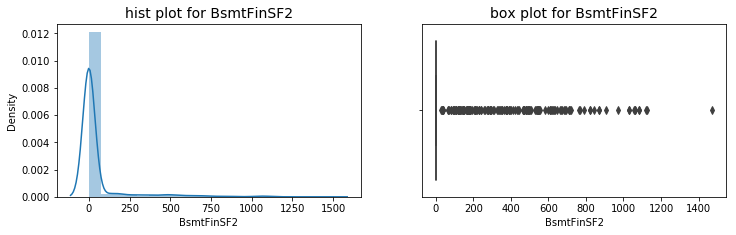

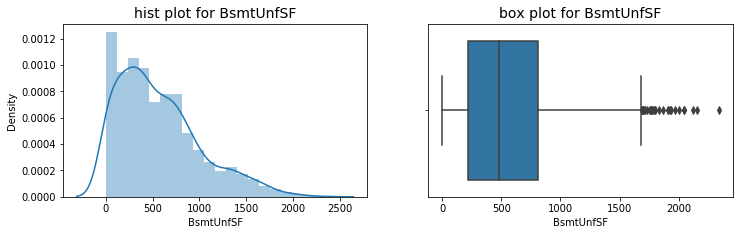

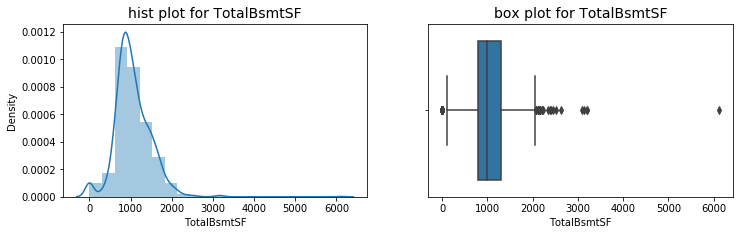

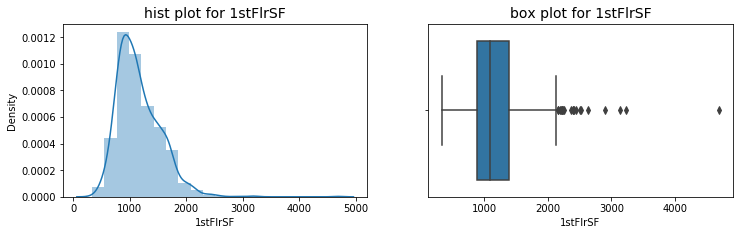

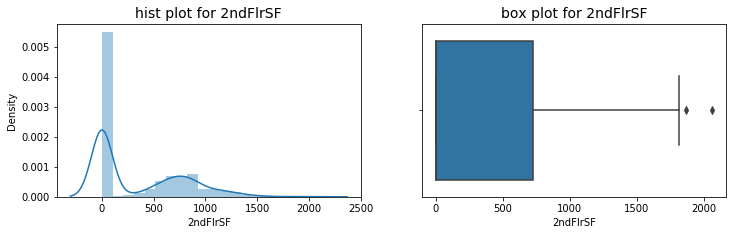

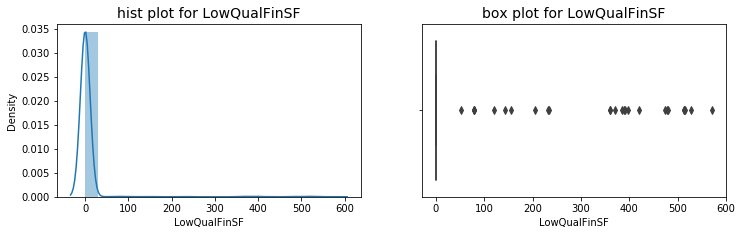

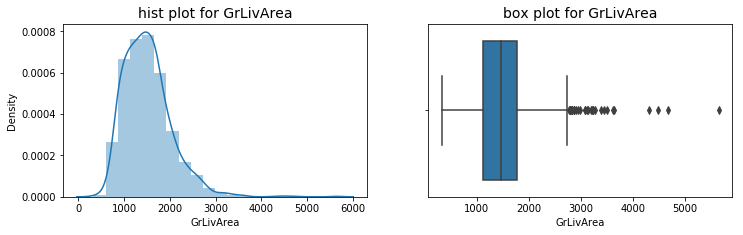

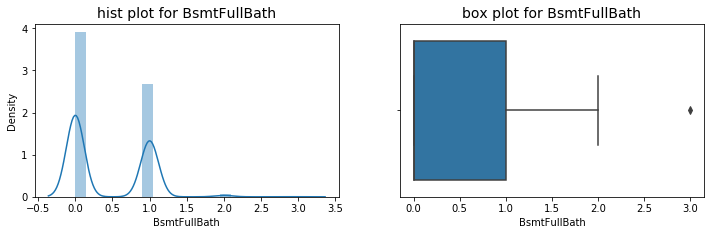

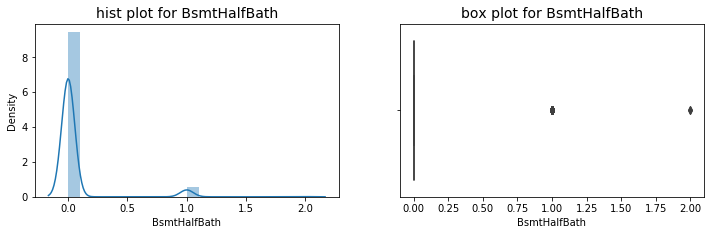

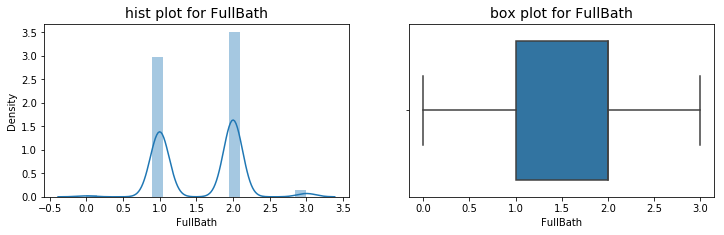

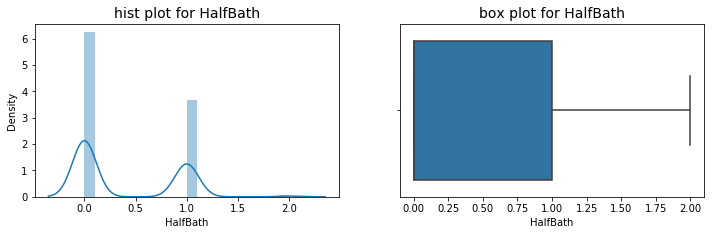

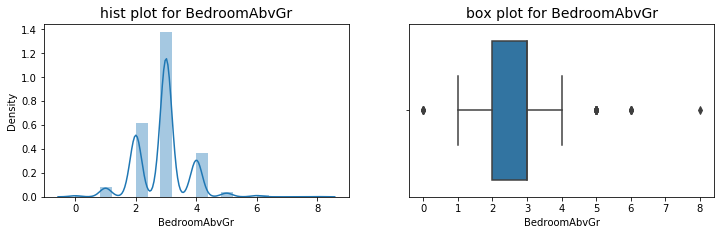

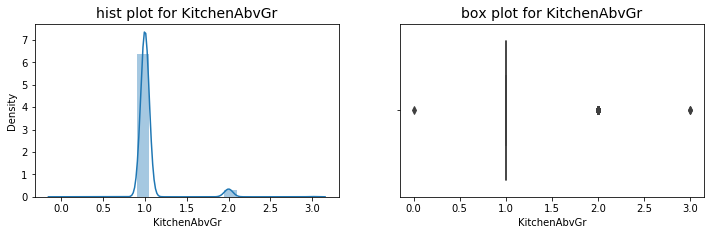

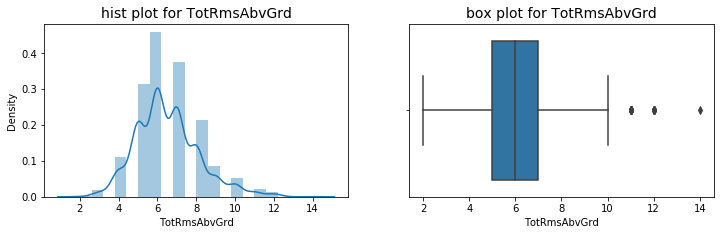

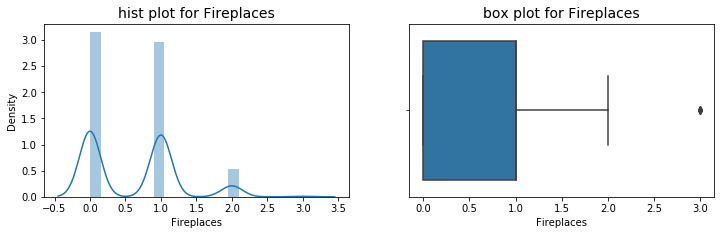

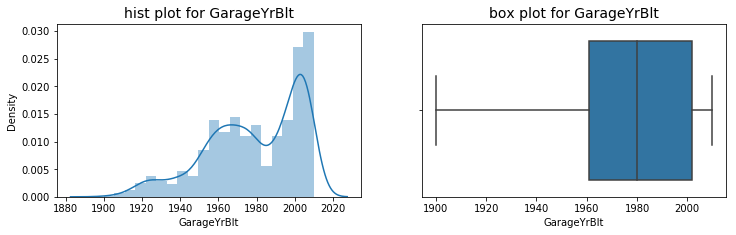

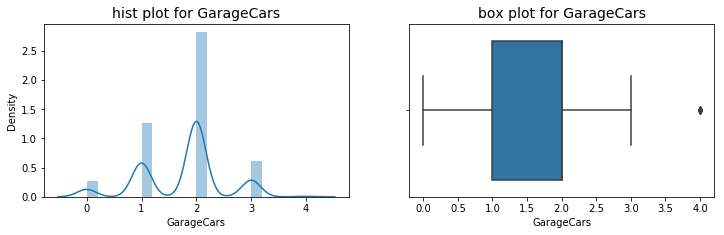

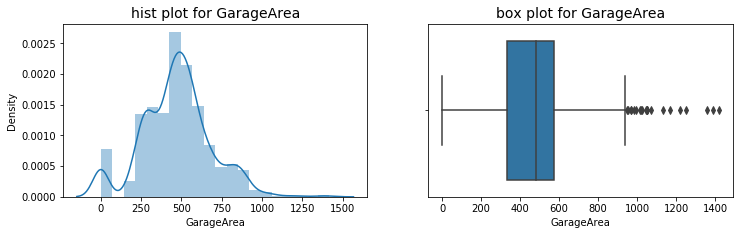

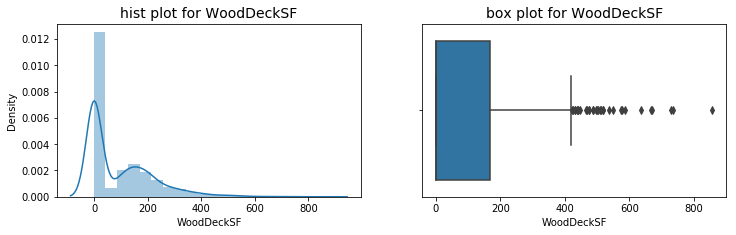

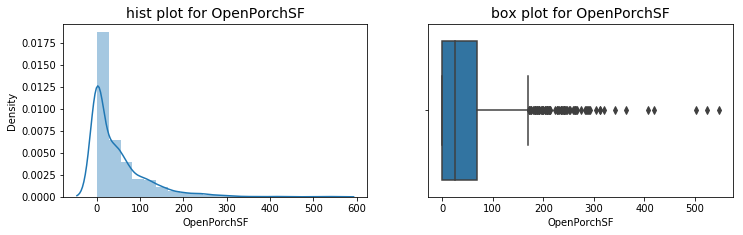

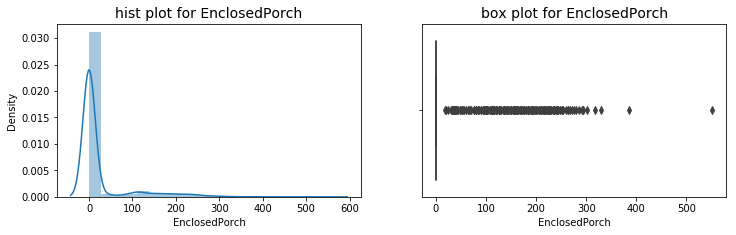

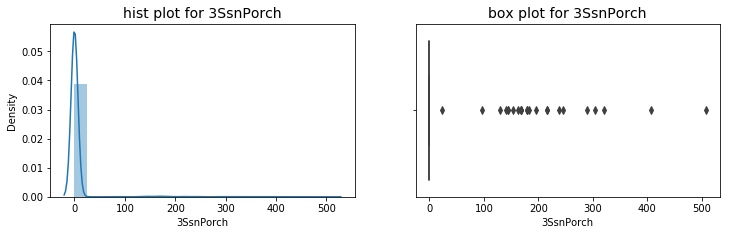

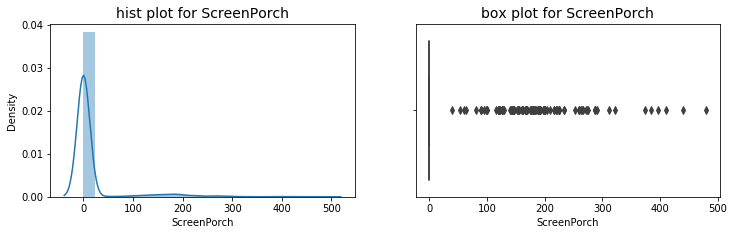

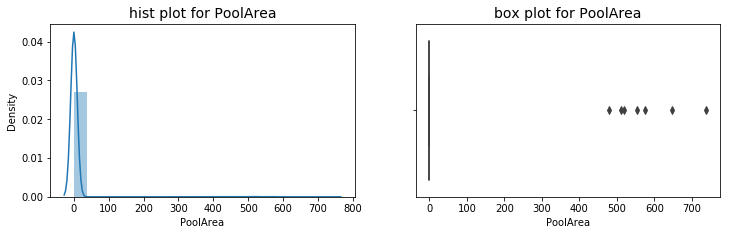

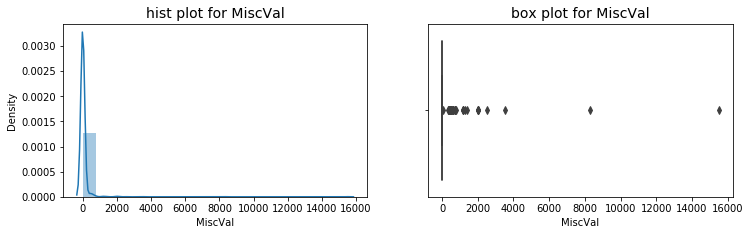

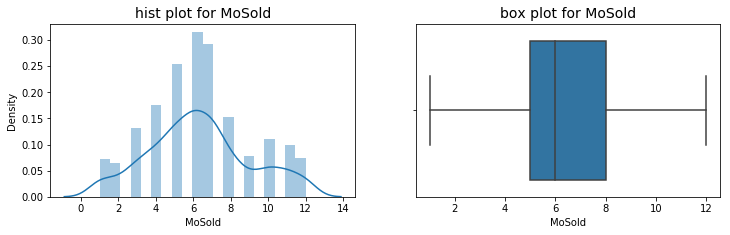

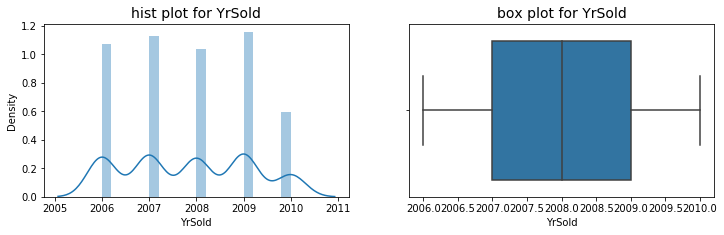

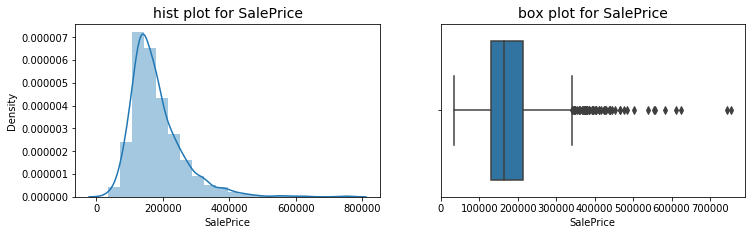

In [8]:
# Creating a function to plot histogram and a box plot of all the variables in the data to check how data is distributed
def plot_uni(i):
    plt.figure(figsize=(12,7))
    plt.subplot(2, 2, 1)
    ax = sns.distplot(housing[i],kde=True,bins=20)
    plt.title("hist plot for " +str(i),fontsize=14)
    # subplot 2
    plt.subplot(2, 2, 2)
    ax = sns.boxplot(housing[i])
    plt.title("box plot for " +str(i),fontsize=14)
    plt.show()
# plotting plot_uni() for all the numeric variables in the data     
for i in numeric:
    plot_uni(i)    

#### There are quite a few outliers in  certain variables that have to be treated

In [9]:
# Printing the outliers percentage in the variables
# Considering median+1.5IQR > outliers < median-1.5IQR 
outliers_percentage={}

for feature in numeric.columns:
    IQR=numeric[feature].quantile(.75)-numeric[feature].quantile(.25)
    outliers_count=numeric[(numeric[feature]>(numeric[feature].quantile(.75)+1.5*IQR)) | (numeric[feature]<(numeric[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric.shape[0]*100,2)
    
outlier=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier.sort_values(by="Percentage", ascending=False)

Features  Percentage
29  EnclosedPorch       14.25
9      BsmtFinSF2       11.44
4     OverallCond        8.56
31    ScreenPorch        7.95
7      MasVnrArea        6.58
1     LotFrontage        6.03
17   BsmtHalfBath        5.62
28    OpenPorchSF        5.27
2         LotArea        4.73
21   KitchenAbvGr        4.66
11    TotalBsmtSF        4.18
36      SalePrice        4.18
33        MiscVal        3.56
20   BedroomAbvGr        2.40
27     WoodDeckSF        2.19
15      GrLivArea        2.12
22   TotRmsAbvGrd        2.05
10      BsmtUnfSF        1.99
14   LowQualFinSF        1.78
30      3SsnPorch        1.64
26     GarageArea        1.44
12       1stFlrSF        1.37
8      BsmtFinSF1        0.48
5       YearBuilt        0.48
32       PoolArea        0.48
23     Fireplaces        0.34
25     GarageCars        0.34
13       2ndFlrSF        0.14
3     OverallQual        0.14
16   BsmtFullBath        0.07
35         YrSold        0.00
34         MoSold        0.00
0              Id        0.00
24    GarageYrBlt        0.00
19       HalfBath        0.00
6    YearRemodAdd        0.00
18       FullBath        0.00

In [10]:
# Capping the maximum and minimum values in the data using max and min values
# max = median + 1.5IQR     min =  median - 1.5IQR
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing[feature].quantile(.75) - housing[feature].quantile(.25) 
        max_value = housing[feature].quantile(.75)+1.5*IQR
        min_value = housing[feature].quantile(.25)-1.5*IQR
        housing[feature][housing[feature] > max_value] = max_value
        housing[feature][housing[feature] < min_value] = min_value

In [11]:
#Looking at the statistical aspect of the data using describe function
housing.describe()

Id  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000   1460.000000  1460.000000  1460.000000   
mean    730.500000    69.134888   9647.388014     6.100685     5.543493   
std     421.610009    19.662022   3594.356399     1.378430     0.963696   
min       1.000000    27.500000   1481.500000     2.000000     3.500000   
25%     365.750000    59.000000   7553.500000     5.000000     5.000000   
50%     730.500000    69.000000   9478.500000     6.000000     5.000000   
75%    1095.250000    80.000000  11601.500000     7.000000     6.000000   
max    1460.000000   111.500000  17673.500000    10.000000     7.500000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000      1460.0   
mean   1971.299315   1984.865753    90.192149   439.997517         0.0   
std      30.108397     20.645407   134.925253   433.219435         0.0   
min    1885.000000   1950.000000     0.000000     0.000000         0.0   
25%    1954.000000   1967.000000     0.000000     0.000000         0.0   
50%    1973.000000   1994.000000     0.000000   383.500000         0.0   
75%    2000.000000   2004.000000   166.000000   712.250000         0.0   
max    2010.000000   2010.000000   415.000000  1780.625000         0.0   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
count      ...        1460.000000  1460.000000         1460.0     1460.0   
mean       ...          91.806849    42.603425            0.0        0.0   
std        ...         116.658120    52.501584            0.0        0.0   
min        ...           0.000000     0.000000            0.0        0.0   
25%        ...           0.000000     0.000000            0.0        0.0   
50%        ...           0.000000    25.000000            0.0        0.0   
75%        ...         168.000000    68.000000            0.0        0.0   
max        ...         420.000000   170.000000            0.0        0.0   

       ScreenPorch  PoolArea  MiscVal       MoSold       YrSold      SalePrice  
count       1460.0    1460.0   1460.0  1460.000000  1460.000000    1460.000000  
mean           0.0       0.0      0.0     6.321918  2007.815753  180921.195890  
std            0.0       0.0      0.0     2.703626     1.328095   79442.502883  
min            0.0       0.0      0.0     1.000000  2006.000000   34900.000000  
25%            0.0       0.0      0.0     5.000000  2007.000000  129975.000000  
50%            0.0       0.0      0.0     6.000000  2008.000000  163000.000000  
75%            0.0       0.0      0.0     8.000000  2009.000000  214000.000000  
max            0.0       0.0      0.0    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [12]:
# There are many variables that have all the values within them with same entry, These are removed as they are not useful
same_data = [feat for feat in housing.select_dtypes(exclude=['object']).columns if housing[feat].min() == housing[feat].max()]
same_data

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [13]:
# Removing the variables with all values as same entries
housing.drop(same_data,axis=1,inplace=True)

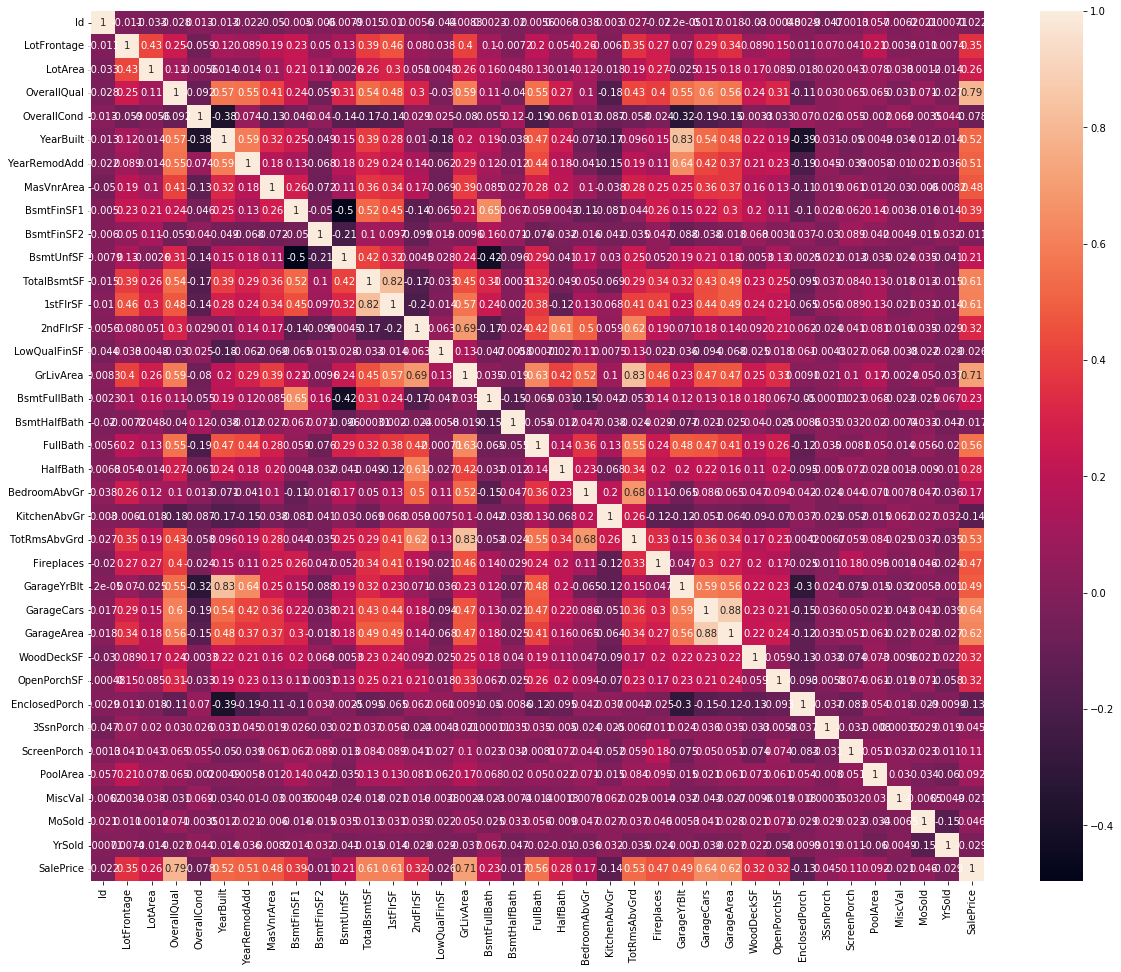

In [14]:
# Plotting a heatmap for the numerical variables to check the correlation
plt.figure(figsize=(20,16))
sns.heatmap(numeric.corr(),annot=True)
plt.show()

<Figure size 1440x1296 with 0 Axes>

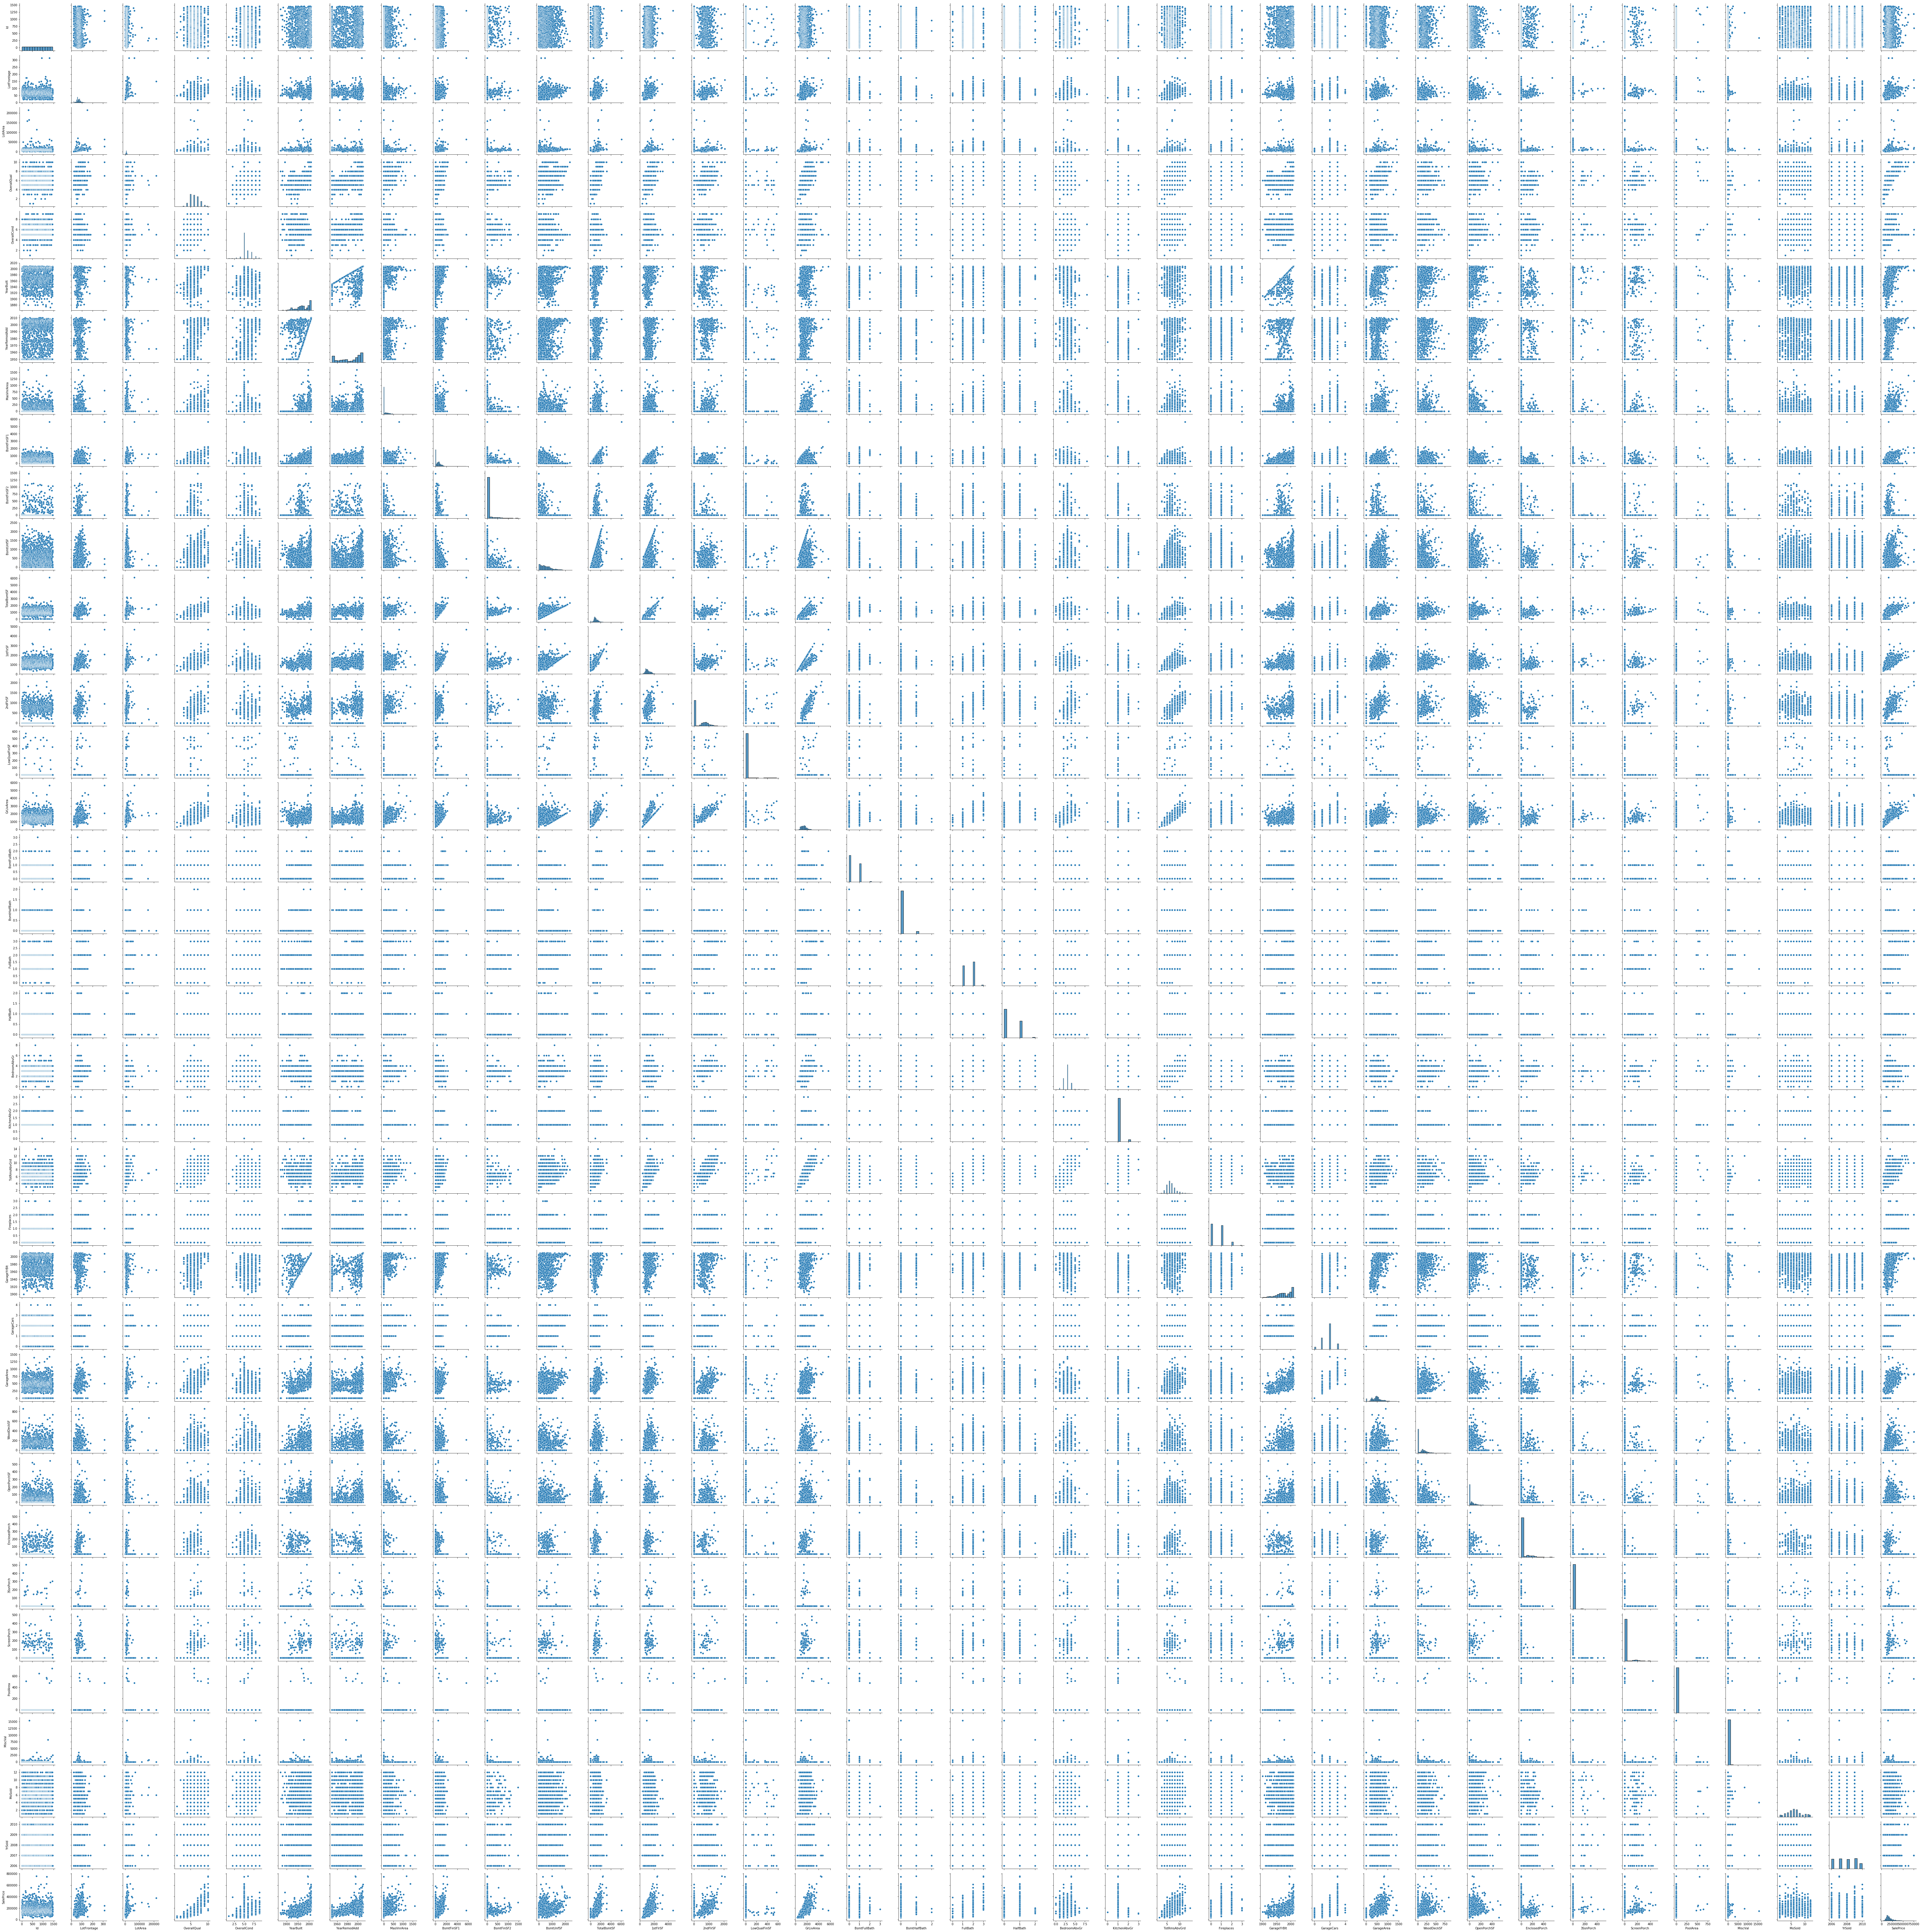

In [15]:
# Plotting a pairplot to see the relation between various predictors and target
plt.figure(figsize=(20,18))
sns.pairplot(numeric)
plt.show()

In [16]:
# creating a function to print the null values percentage in the data
def get_null(df):
    null = df.isnull().mean() * 100  
    null = null[null>0].sort_values(ascending = False)
    print(null)

In [17]:
# Looking at the null values percentage
get_null(housing)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


### After analysing the data dictionary, it was found that a lot of the NaN values actually correspond to the value None, so to keep the data intact, we are replacing the NaN values with "Nd"

In [18]:
# Replacing the NaN values with "Nd"
na_impute = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual',
             'BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType']
for i in na_impute:
    housing[i].fillna("Nd",inplace=True)

In [19]:
# 'Electrical' variable had a NaN value which is replaced after performing a segemented univariate analysis
housing['Electrical'].fillna('SBrkr',inplace=True)

In [20]:
# Numerical Variables with NaN values are replaced by using the mean() of the variables
for i in ['LotFrontage','GarageYrBlt','MasVnrArea']:
    housing[i].fillna(housing[i].mean(),inplace=True)

In [21]:
# Looking at the null values in the data frame
get_null(housing)

Series([], dtype: float64)


## Data Preparation
#### This process involves setting up of data to build a model

In [22]:
# Separating the categorical variables into a dataframe categorical_vars
categorical_vars = housing.select_dtypes(include=['object'])
categorical_vars.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

### Label encoding
#### A lot of the categorical variables in the data are ordinally present in categorical format, Hence they are converted into Numericals using ranking 

In [23]:
# Performing label encoding onto variable that have ordinal categorical entries
housing['LotShape'] = housing['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing['Utilities'] = housing['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing['LandSlope'] = housing['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing['HouseStyle'] = housing['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing['ExterQual'] = housing['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['ExterCond'] = housing['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['BsmtQual'] = housing['BsmtQual'].map({'Nd':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtCond'] = housing['BsmtCond'].map({'Nd':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Nd':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'Nd':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({'Nd':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['HeatingQC'] = housing['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['CentralAir'] = housing['CentralAir'].map({'N':0,'Y':1})
housing['KitchenQual'] = housing['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['GarageFinish'] = housing['GarageFinish'].map({'Nd':0,'Unf':1,'RFn':2,'Fin':3})
housing['GarageQual'] = housing['GarageQual'].map({'Nd':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['GarageCond'] = housing['GarageCond'].map({'Nd':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['Functional'] = housing['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing['FireplaceQu'] = housing['FireplaceQu'].map({'Nd':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

### Dummies creation

In [24]:
# Using Pandas to create dummy variables for all of the categorical features and looking at the shape of the dummy_vars
dummy_vars = pd.get_dummies(categorical_vars,drop_first=True)
dummy_vars.shape

(1460, 238)

In [25]:
# There are a lot of dummy variables that have highly class imbalanced data 
# It is better to drop dummies where >95% of data is of a single class

dummies_to_drop = [feat for feat in dummy_vars.columns if dummy_vars[feat].value_counts()[0]/dummy_vars.shape[0] >= 0.95]
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 

In [26]:
# dropping the dummies_to_drop from the dummy_vars
dummy_vars = dummy_vars.drop(dummies_to_drop,axis=1)

In [27]:
# Dropping all the categorical variables and 'Id' feature
housing.drop(categorical_vars,inplace=True,axis=1)
housing.drop('Id',axis=1,inplace=True)

In [28]:
# Concatenating the housing and dummy_vars dataframe
housing = pd.concat([housing,dummy_vars],axis=1)

In [29]:
# Shape of the dataframe after adding dummy_variables
housing.shape

(1460, 117)

## Model Building
#### In this phase we will build both ridge and lasso regression models

In [30]:
# Since the 'SalePrice' is right skewed, using a log function normalises the data.
# Splitting the data frame into X,y
y = np.log(housing.pop('SalePrice'))
X = housing

In [31]:
# Splitting the data into train and test data sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
# printing the shape of train and test data-sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 116)
(438, 116)
(1022,)
(438,)


In [33]:
# Instantiating StandardScaler and fit it on X_train
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [34]:
# Creating new Dataframes to store the scaler_transformed X_train and X_test 
# This new dataframes are created because, using standard scaling creates a numpy array.
X_train_scaled = pd.DataFrame(data=scaler.transform(X_train),columns=X_train.columns)
X_test_scaled  = pd.DataFrame(data=scaler.transform(X_test),columns=X_test.columns)

In [35]:
# Since we have lot of predictors, we will use RFE to filter out the best predictors,
# Instantiating LinearRegression object and fitting it on X_train_scaled and y_train
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
# Instantiating RFE object and filtering out the top predictors
rfe = RFE(lr)
rfe.fit(X_train_scaled,y_train)

RFE(estimator=LinearRegression())

In [36]:
# Separating the variables that are filtered by rfe into rfe_cols
rfe_ranking = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
rfe_cols = [cols[0] for cols in rfe_ranking if cols[1]==True]
len(rfe_cols)

58

In [37]:
# Updating the X_train and X_test dataset to have only rfe_cols
X_train_scaled = X_train_scaled[rfe_cols]
X_test_scaled = X_test_scaled[rfe_cols]

In [38]:
# Shape of the X_train with only rfe_cols
X_train_scaled.shape

(1022, 58)

In [39]:
# Building a function that returns the final_model and the y_test_pred
def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

In [40]:
# setting the parameters for alpha to find the best value of hyperparameter in Ridge Regrerssion
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_scaled, y_train, X_test_scaled, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.9109376866592218
R2 score (test) :  0.9029575007258227
RMSE (train) :  0.11749536809023096
RMSE (test) :  0.12830778559104794


In [41]:
# setting the parameters for alpha to find the best value of hyperparameter in Lasso Regression
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_scaled, y_train, X_test_scaled, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.000100
lasso  Regression with  0.0001
R2 score (train) :  0.9111742398582051
R2 score (test) :  0.9029583365376971
RMSE (train) :  0.11733922805672248
RMSE (test) :  0.1283072330424095


In [42]:
# Creating a dataframe that consists of the predictors and their coefficients in both Ridge and Lasso Regression
model_coefficients = pd.DataFrame(index=X_test_scaled.columns)
model_coefficients.rows = X_test_scaled.columns

model_coefficients['Ridge (alpha=20.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=20.0)  Lasso (alpha=0.0001)
LotArea                         0.034695              0.034157
OverallQual                     0.076318              0.076856
OverallCond                     0.044598              0.046340
YearBuilt                       0.039193              0.044496
YearRemodAdd                    0.023921              0.022497
BsmtUnfSF                      -0.038368             -0.040868
TotalBsmtSF                     0.070947              0.070292
2ndFlrSF                        0.034561              0.031216
GrLivArea                       0.121507              0.130473
Fireplaces                      0.023045              0.022003
GarageCars                      0.036121              0.035261
OpenPorchSF                     0.007664              0.007232
MSSubClass_60                  -0.010669             -0.011636
MSSubClass_120                  0.010422              0.011104
MSZoning_RL                     0.009682              0.009888
MSZoning_RM                    -0.014946             -0.014406
LotConfig_CulDSac               0.010609              0.010550
Neighborhood_Edwards           -0.014849             -0.014831
Neighborhood_NAmes             -0.010015             -0.009824
Neighborhood_NridgHt            0.008189              0.007435
Neighborhood_OldTown           -0.010847             -0.010553
Neighborhood_Somerst            0.014014              0.014341
Condition1_Norm                 0.019319              0.019863
Condition2_Norm                 0.016139              0.016269
BldgType_TwnhsE                -0.009052             -0.009586
HouseStyle_1Story               0.007869              0.008438
HouseStyle_2Story              -0.012737             -0.013258
RoofStyle_Gable                -0.016735             -0.019435
RoofStyle_Hip                  -0.011281             -0.015100
Exterior1st_HdBoard            -0.013414             -0.014401
Exterior1st_Plywood            -0.011364             -0.012137
Exterior1st_VinylSd            -0.010094             -0.009809
Exterior1st_Wd Sdng            -0.020882             -0.022065
Exterior2nd_HdBoard             0.004935              0.006153
Exterior2nd_Wd Sdng             0.015714              0.017143
MasVnrType_BrkFace              0.008195              0.012198
MasVnrType_None                 0.015043              0.020109
MasVnrType_Stone                0.008410              0.010591
Foundation_PConc                0.021539              0.021418
BsmtQual_Gd                    -0.014679             -0.014996
BsmtQual_TA                    -0.021905             -0.021224
BsmtCond_TA                     0.011165              0.011427
BsmtExposure_Gd                 0.011840              0.011441
BsmtExposure_No                -0.008803             -0.008182
CentralAir_Y                    0.023415              0.023294
KitchenQual_Gd                 -0.015937             -0.017803
KitchenQual_TA                 -0.022811             -0.023728
Functional_Typ                  0.022916              0.023943
GarageType_Attchd               0.013226              0.014269
GarageType_Detchd               0.011905              0.013807
GarageType_Nd                  -0.009332             -0.011054
GarageFinish_Unf               -0.011300             -0.010614
GarageQual_TA                  -0.005964             -0.006549
GarageCond_Nd                  -0.009332             -0.006756
PavedDrive_Y                    0.009023              0.008498
PoolQC_Nd                       0.011147              0.011679
SaleType_New                    0.019939              0.020564
SaleCondition_Normal            0.013467              0.014137

In [43]:
# Converting the predictions to their original scale (anti log)
test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:10])

[156063 337905 105172 158945 317088  82683 238665 142274  85337 146660]


## Final Model
From both the ridge and lasso regularisation model we built, ridge model has a better r2_score in test-set than lasso. The RMSE of test-set in ridge is also lower than that of lasso. Hence we choose to go ahead with Ridge regression.

In [44]:
#Looking at the top model coefficients of Ridge model.
model_coefficients[['Ridge (alpha=20.0)']].sort_values(by='Ridge (alpha=20.0)', ascending=False)

Ridge (alpha=20.0)
GrLivArea                       0.121507
OverallQual                     0.076318
TotalBsmtSF                     0.070947
OverallCond                     0.044598
YearBuilt                       0.039193
GarageCars                      0.036121
LotArea                         0.034695
2ndFlrSF                        0.034561
YearRemodAdd                    0.023921
CentralAir_Y                    0.023415
Fireplaces                      0.023045
Functional_Typ                  0.022916
Foundation_PConc                0.021539
SaleType_New                    0.019939
Condition1_Norm                 0.019319
Condition2_Norm                 0.016139
Exterior2nd_Wd Sdng             0.015714
MasVnrType_None                 0.015043
Neighborhood_Somerst            0.014014
SaleCondition_Normal            0.013467
GarageType_Attchd               0.013226
GarageType_Detchd               0.011905
BsmtExposure_Gd                 0.011840
BsmtCond_TA                     0.011165
PoolQC_Nd                       0.011147
LotConfig_CulDSac               0.010609
MSSubClass_120                  0.010422
MSZoning_RL                     0.009682
PavedDrive_Y                    0.009023
MasVnrType_Stone                0.008410
MasVnrType_BrkFace              0.008195
Neighborhood_NridgHt            0.008189
HouseStyle_1Story               0.007869
OpenPorchSF                     0.007664
Exterior2nd_HdBoard             0.004935
GarageQual_TA                  -0.005964
BsmtExposure_No                -0.008803
BldgType_TwnhsE                -0.009052
GarageCond_Nd                  -0.009332
GarageType_Nd                  -0.009332
Neighborhood_NAmes             -0.010015
Exterior1st_VinylSd            -0.010094
MSSubClass_60                  -0.010669
Neighborhood_OldTown           -0.010847
RoofStyle_Hip                  -0.011281
GarageFinish_Unf               -0.011300
Exterior1st_Plywood            -0.011364
HouseStyle_2Story              -0.012737
Exterior1st_HdBoard            -0.013414
BsmtQual_Gd                    -0.014679
Neighborhood_Edwards           -0.014849
MSZoning_RM                    -0.014946
KitchenQual_Gd                 -0.015937
RoofStyle_Gable                -0.016735
Exterior1st_Wd Sdng            -0.020882
BsmtQual_TA                    -0.021905
KitchenQual_TA                 -0.022811
BsmtUnfSF                      -0.038368

In [45]:
#Printing the top 10 model coefficients of Ridge regression
model_coefficients[['Ridge (alpha=20.0)']].sort_values(by='Ridge (alpha=20.0)', ascending=False).index[:10]

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt',
       'GarageCars', 'LotArea', '2ndFlrSF', 'YearRemodAdd', 'CentralAir_Y'],
      dtype='object')

### Subjective questions

### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


In [46]:
# Ridge Model Building
ridge_model = Ridge(alpha=40.0)
ridge_model.fit(X_train_scaled, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

print("Model Evaluation : Ridge Regression, alpha=40.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=40.0
R2 score (train) :  0.9104
R2 score (test) :  0.9029
RMSE (train) :  0.1179
RMSE (test) :  0.1284


In [47]:
# Lasso Model building
lasso_model = Lasso(alpha=0.0002)
lasso_model.fit(X_train_scaled, y_train)
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9111
R2 score (test) :  0.9034
RMSE (train) :  0.1174
RMSE (test) :  0.128


In [48]:
#Adding the new coefficients to the model_coefficients dataframe
model_coefficients['Ridge (alpha = 40.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.0002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=20.0)  Lasso (alpha=0.0001)  \
LotArea                         0.034695              0.034157   
OverallQual                     0.076318              0.076856   
OverallCond                     0.044598              0.046340   
YearBuilt                       0.039193              0.044496   
YearRemodAdd                    0.023921              0.022497   
BsmtUnfSF                      -0.038368             -0.040868   
TotalBsmtSF                     0.070947              0.070292   
2ndFlrSF                        0.034561              0.031216   
GrLivArea                       0.121507              0.130473   
Fireplaces                      0.023045              0.022003   
GarageCars                      0.036121              0.035261   
OpenPorchSF                     0.007664              0.007232   
MSSubClass_60                  -0.010669             -0.011636   
MSSubClass_120                  0.010422              0.011104   
MSZoning_RL                     0.009682              0.009888   
MSZoning_RM                    -0.014946             -0.014406   
LotConfig_CulDSac               0.010609              0.010550   
Neighborhood_Edwards           -0.014849             -0.014831   
Neighborhood_NAmes             -0.010015             -0.009824   
Neighborhood_NridgHt            0.008189              0.007435   
Neighborhood_OldTown           -0.010847             -0.010553   
Neighborhood_Somerst            0.014014              0.014341   
Condition1_Norm                 0.019319              0.019863   
Condition2_Norm                 0.016139              0.016269   
BldgType_TwnhsE                -0.009052             -0.009586   
HouseStyle_1Story               0.007869              0.008438   
HouseStyle_2Story              -0.012737             -0.013258   
RoofStyle_Gable                -0.016735             -0.019435   
RoofStyle_Hip                  -0.011281             -0.015100   
Exterior1st_HdBoard            -0.013414             -0.014401   
Exterior1st_Plywood            -0.011364             -0.012137   
Exterior1st_VinylSd            -0.010094             -0.009809   
Exterior1st_Wd Sdng            -0.020882             -0.022065   
Exterior2nd_HdBoard             0.004935              0.006153   
Exterior2nd_Wd Sdng             0.015714              0.017143   
MasVnrType_BrkFace              0.008195              0.012198   
MasVnrType_None                 0.015043              0.020109   
MasVnrType_Stone                0.008410              0.010591   
Foundation_PConc                0.021539              0.021418   
BsmtQual_Gd                    -0.014679             -0.014996   
BsmtQual_TA                    -0.021905             -0.021224   
BsmtCond_TA                     0.011165              0.011427   
BsmtExposure_Gd                 0.011840              0.011441   
BsmtExposure_No                -0.008803             -0.008182   
CentralAir_Y                    0.023415              0.023294   
KitchenQual_Gd                 -0.015937             -0.017803   
KitchenQual_TA                 -0.022811             -0.023728   
Functional_Typ                  0.022916              0.023943   
GarageType_Attchd               0.013226              0.014269   
GarageType_Detchd               0.011905              0.013807   
GarageType_Nd                  -0.009332             -0.011054   
GarageFinish_Unf               -0.011300             -0.010614   
GarageQual_TA                  -0.005964             -0.006549   
GarageCond_Nd                  -0.009332             -0.006756   
PavedDrive_Y                    0.009023              0.008498   
PoolQC_Nd                       0.011147              0.011679   
SaleType_New                    0.019939              0.020564   
SaleCondition_Normal            0.013467              0.014137   

                      Ridge (alpha = 40.0)  Lasso (alpha = 0.0002)  
LotArea                           0.035026                

In [49]:
# Looking at the top 3 variables in the Lasso model
model_coefficients.sort_values(by='Lasso (alpha = 0.0002)', ascending=False).head(3)

Ridge (alpha=20.0)  Lasso (alpha=0.0001)  Ridge (alpha = 40.0)  \
GrLivArea              0.121507              0.130473              0.115176   
OverallQual            0.076318              0.076856              0.075856   
TotalBsmtSF            0.070947              0.070292              0.070759   

             Lasso (alpha = 0.0002)  
GrLivArea                  0.130874  
OverallQual                0.077365  
TotalBsmtSF                0.070268

In [50]:
# Looking at the top 3 variables in the Ridge model
model_coefficients.sort_values(by='Ridge (alpha = 40.0)', ascending=False).head(3)

Ridge (alpha=20.0)  Lasso (alpha=0.0001)  Ridge (alpha = 40.0)  \
GrLivArea              0.121507              0.130473              0.115176   
OverallQual            0.076318              0.076856              0.075856   
TotalBsmtSF            0.070947              0.070292              0.070759   

             Lasso (alpha = 0.0002)  
GrLivArea                  0.130874  
OverallQual                0.077365  
TotalBsmtSF                0.070268

### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [51]:
# Top 5 featues in Lasso final model
model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False).head(5)

Ridge (alpha=20.0)  Lasso (alpha=0.0001)  Ridge (alpha = 40.0)  \
GrLivArea              0.121507              0.130473              0.115176   
OverallQual            0.076318              0.076856              0.075856   
TotalBsmtSF            0.070947              0.070292              0.070759   
OverallCond            0.044598              0.046340              0.043091   
YearBuilt              0.039193              0.044496              0.034980   

             Lasso (alpha = 0.0002)  
GrLivArea                  0.130874  
OverallQual                0.077365  
TotalBsmtSF                0.070268  
OverallCond                0.046345  
YearBuilt                  0.043743

In [52]:
# Removing the top 5 predcitors from the X_train and X_test dataset
X_train_new = X_train_scaled.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'OverallCond'], axis=1)
X_test_new = X_test_scaled.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'OverallCond'], axis=1)

In [53]:
# Building a new lasso model after removing top 5 predictors
alpha = 0.0001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [54]:
# Looking at the model coefficients
lasso_model.coef_

array([ 0.06620967,  0.06541902,  0.00191893,  0.16239927,  0.0524745 ,
        0.07926469,  0.0230725 , -0.0421751 ,  0.02295341,  0.00572106,
       -0.02005931,  0.01191749, -0.02695277, -0.01530732,  0.01727966,
       -0.02043989,  0.00765747,  0.01910224,  0.01488115, -0.02376374,
        0.0297604 , -0.03450019, -0.0270523 ,  0.00216887, -0.02719008,
       -0.01015371, -0.03180175, -0.03814539,  0.01055138,  0.02950318,
        0.02149461,  0.00762757,  0.02444353,  0.02898094, -0.0159743 ,
       -0.03181898,  0.02492513,  0.02736433, -0.01169563,  0.03983489,
       -0.04396879, -0.06741504,  0.02057123,  0.05033346,  0.02860446,
       -0.00308832, -0.02681533, -0.00862146, -0.01024856,  0.02274555,
        0.00804869,  0.01599228,  0.00707296])

In [55]:
# Printing the top 5 model coefficients in the new Lasso model
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

Lasso
2ndFlrSF      0.162399
GarageCars    0.079265
LotArea       0.066210
YearRemodAdd  0.065419
Fireplaces    0.052474